<a href="https://colab.research.google.com/github/lanpty58/mystudy/blob/main/Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Genetic Algorithm:
1.   Population Initialization
2.   Sort and select better individual
3.   Exchange (Crossover)
4.   Mutation
5.   Evaluation
6.   Finish



Exercise: Sales Estimation

In [34]:
from numpy.lib.npyio import load
import random
import pandas as pd
import numpy as np

random.seed(0)

def load_data(fileName):
  data = pd.read_csv(fileName)
  data = data.to_numpy()
  sales_Y = data[:, -1]
  feature_X = data[:, :-1]
  b_arr = np.ones((feature_X.shape[0], 1))
  feature_X = np.concatenate((b_arr, feature_X), axis=1)
  return feature_X, sales_Y

def create_individual(n = 4):
  individual = [np.random.random() for _ in range(n)]
  return individual

def compute_loss(individual):
  theta = np.array(individual)
  y_h = X.dot(theta)
  loss = np.multiply((y_h - y), (y_h - y)).mean()
  return loss

def compute_fitness(individual):
  loss = compute_loss(individual)
  fitness_value = 1/(loss+ 1e-5)
  return fitness_value

def crossover(individual1, individual2, crossover_rate = 0.9):
  ind_new1 = individual1.copy()
  ind_new2 = individual2.copy()

  for i in range(len(individual1)):
    if(np.random.uniform() < crossover_rate):
      ind_new1[i] = individual2[i]
      ind_new2[i] = individual1[i]

  return ind_new1, ind_new2

def mutate(individual, mutation_rate = 0.05):
  ind_m = individual.copy()
  for i in range(len(individual)):
    if random.random() < 0.05:
      ind_m[i] = random.random()
  return ind_m

def selection(sorted_old_population, m = 100):
  index1 = random.randint(0, m-1)
  while True:
    index2 = random.randint(0, m-1)
    if index1 != index2:
      break
  ind = sorted_old_population[index1]
  if index2 > index1:
    ind = sorted_old_population[index2]
  return ind

def create_new_popolation(old_population, elitism = 2, gen = 1):
  m = len(old_population)
  sorted_population = sorted(old_population, key= compute_fitness)

  # if gen%1==0:
  #   print("Best loss: ", compute_loss(sorted_population[-1]), 'with chromsome: ', sorted_population[-1])

  new_population = []
  for i in range(elitism):
    new_population.append(sorted_population[-i-1])

  while len(new_population) < m:
    #selection
    ind1 = selection(sorted_population, m)
    ind2 = selection(sorted_population, m)

    #crossover
    ind1, ind2 = crossover(ind1, ind2)

    #mutation
    ind1 = mutate(ind1)
    ind2 = mutate(ind2)

    new_population.append(ind1)
    new_population.append(ind2)

  return new_population, compute_loss(sorted_population[-1])

def run_GA( n_generations = 100):
  m = 600
  elitism = 2
  population = [create_individual() for _ in range(m)]
  losses = []
  for i in range(n_generations):
    population, loss = create_new_popolation(population)
    losses.append(loss)

  return losses, population[-1]


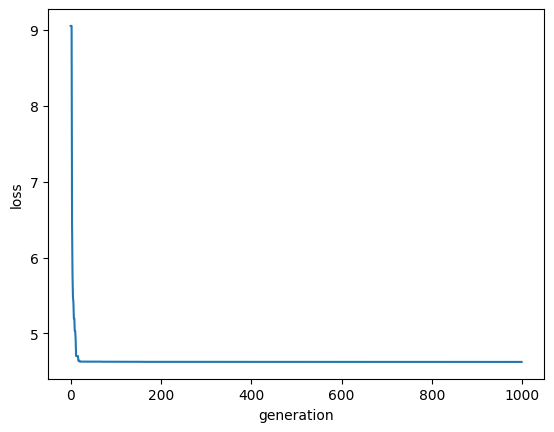

In [38]:
import matplotlib.pyplot as plt

def visualize_loss(losses):
  plt.plot(losses)
  plt.xlabel("generation")
  plt.ylabel("loss")
  plt.show()

X, y = load_data('/content/drive/MyDrive/AI/data/advertising.csv')
losses, theta = run_GA(1000)
visualize_loss(losses)

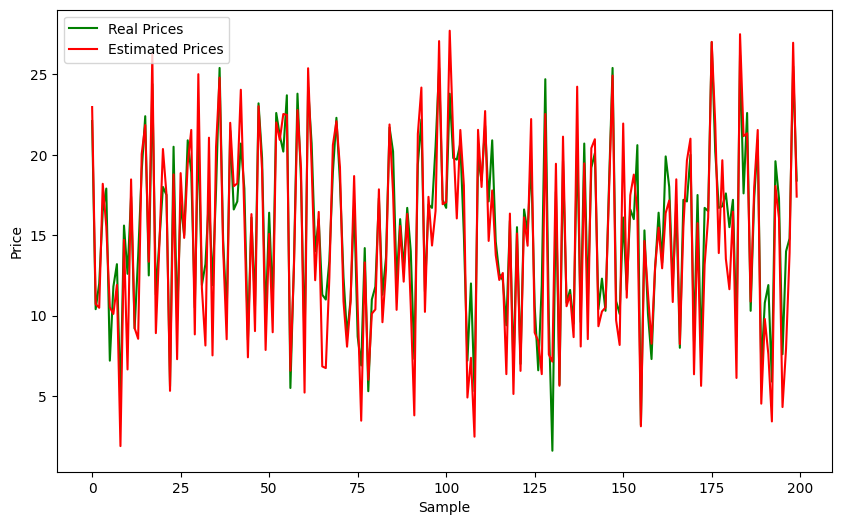

In [39]:
def visualize_predict_value(theta):
  #visualization of ground truth and predict value
  theta = np.array(theta)
  estimation_price = X.dot(theta)

  fig, ax = plt.subplots(figsize = (10, 6))
  plt.xlabel('Sample')
  plt.ylabel('Price')
  plt.plot(y, c ='green', label = 'Real Prices')
  plt.plot(estimation_price, c = 'red', label = 'Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_value(theta)